In [52]:
import random
import numpy as np
import networkx as nx
from itertools import combinations, groupby

Generando grafos aleatorios

In [32]:
def gnp_random_connected_graph(n, p):
    """
    Generates a random undirected graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted
    Source: https://stackoverflow.com/questions/61958360/how-to-create-random-graph-where-each-node-has-at-least-1-edge-using-networkx
    """
    edges = combinations(range(n), 2)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    if p <= 0:
        return G
    if p >= 1:
        return nx.complete_graph(n, create_using=G)
    for _, node_edges in groupby(edges, key=lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < p:
                G.add_edge(*e)
    return G

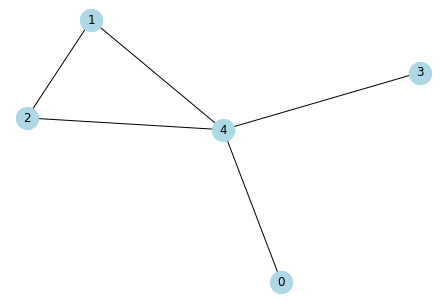

In [41]:
# ejemplo
nodes = random.randint(5,10)
seed = 3
probability = 0.1
G = gnp_random_connected_graph(nodes,probability)

nx.draw(G, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

Listar nodos:

In [93]:
nodos = list(G.nodes)
nodos

[0, 1, 2, 3, 4]

- Encontrar vecinos de un nodo:

In [91]:
neighbors = list(G.neighbors(2))
neighbors

[1, 4]

In [47]:
for n in nodes:
    print(f'* Nodo: {n}')
    print(f'\tNodos vecinos: {list(G.neighbors(n))}')

* Nodo: 0
	Nodos vecinos: [4]
* Nodo: 1
	Nodos vecinos: [2, 4]
* Nodo: 2
	Nodos vecinos: [1, 4]
* Nodo: 3
	Nodos vecinos: [4]
* Nodo: 4
	Nodos vecinos: [0, 1, 2, 3]


In [99]:
nivel_feromona = {}

for nodo in nodos:
    nivel_feromona[nodo] = {}
    neighbors = list(G.neighbors(nodo))
    for neighbor in neighbors:
        nivel_feromona[nodo][neighbor] = 1
        
nivel_feromona

{0: {4: 1},
 1: {2: 1, 4: 1},
 2: {1: 1, 4: 1},
 3: {4: 1},
 4: {0: 1, 1: 1, 2: 1, 3: 1}}

In [96]:
nivel_atraccion = {}

for nodo in nodos:
    nivel_atraccion[nodo] = {}
    neighbors = list(G.neighbors(nodo))
    for neighbor in neighbors:
        nivel_atraccion[nodo][neighbor] = 0.5
        
nivel_atraccion

{0: {4: 0.5},
 1: {2: 0.5, 4: 0.5},
 2: {1: 0.5, 4: 0.5},
 3: {4: 0.5},
 4: {0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5}}

- Grado de atracción de cada nodo, $v$:

$$
v = \tau_{i,j}^{\alpha} \eta_{i,j}^{\beta}
$$

In [116]:
def atraccion_nodos(G, tau, eta, alpha=1, beta=5):    
    """Calcula el grado de atracción de un nodo n perteneciente al grafo G.

    Args:
        G (networkx graph): Grafo de networkx.
        tau: 
        eta:
        alpha (float): Factor de influencia (exponente del nivel de feronomas)
        beta: exponente anterior

    Returns:
        atrac: Lista con los valores de atracción de los vecinos del nodo j.
    """
    dic_attr = {}
    # componentes del grafo
    nodos = list(G.nodes)
    
    
    for nodo in nodos:
        dic_attr[nodo] = {}
        neighbors = list(G.neighbors(nodo))
        for neighbor in neighbors:
            print(f'Nodo: {nodo} / neighbor {neighbor}')
            attr = tau[nodo][neighbor]**alpha + eta[nodo][neighbor]**beta
            dic_attr[nodo][neighbor] = attr
        
    return dic_attr

In [117]:
atraccion_nodos(G, tau=nivel_feromona, eta=nivel_atraccion, alpha=1, beta=5)

Nodo: 0 / neighbor 4
Nodo: 1 / neighbor 2
Nodo: 1 / neighbor 4
Nodo: 2 / neighbor 1
Nodo: 2 / neighbor 4
Nodo: 3 / neighbor 4
Nodo: 4 / neighbor 0
Nodo: 4 / neighbor 1
Nodo: 4 / neighbor 2
Nodo: 4 / neighbor 3


{0: {4: 1.03125},
 1: {2: 1.03125, 4: 1.03125},
 2: {1: 1.03125, 4: 1.03125},
 3: {4: 1.03125},
 4: {0: 1.03125, 1: 1.03125, 2: 1.03125, 3: 1.03125}}